# Strategy: Buy and Hold #

## 1) Preparing the Data ##

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings

import yfinance as yf

warnings.filterwarnings('ignore') 

In [2]:
# Importing the data

data = yf.download("^NSEI", start="2013-12-02", end="2023-12-02", interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [3]:
# checking the data

data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-02,6171.149902,6228.700195,6171.149902,6217.850098,6217.850098,145900
2013-12-03,6204.250000,6225.399902,6191.399902,6201.850098,6201.850098,156900
2013-12-04,6187.950195,6209.149902,6149.899902,6160.950195,6160.950195,186200
2013-12-05,6262.450195,6300.549805,6232.000000,6241.100098,6241.100098,186100
2013-12-06,6234.399902,6275.350098,6230.750000,6259.899902,6259.899902,158500
...,...,...,...,...,...,...
2023-11-24,19809.599609,19832.849609,19768.849609,19794.699219,19794.699219,145900
2023-11-28,19844.650391,19916.849609,19800.000000,19889.699219,19889.699219,229600
2023-11-29,19976.550781,20104.650391,19956.300781,20096.599609,20096.599609,236200


In [4]:
# checking the head

data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-02,6171.149902,6228.700195,6171.149902,6217.850098,6217.850098,145900
2013-12-03,6204.250000,6225.399902,6191.399902,6201.850098,6201.850098,156900
2013-12-04,6187.950195,6209.149902,6149.899902,6160.950195,6160.950195,186200
2013-12-05,6262.450195,6300.549805,6232.000000,6241.100098,6241.100098,186100
2013-12-06,6234.399902,6275.350098,6230.750000,6259.899902,6259.899902,158500


In [5]:
# checking the tail 

data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-24,19809.599609,19832.849609,19768.849609,19794.699219,19794.699219,145900
2023-11-28,19844.650391,19916.849609,19800.000000,19889.699219,19889.699219,229600
2023-11-29,19976.550781,20104.650391,19956.300781,20096.599609,20096.599609,236200
2023-11-30,20108.500000,20158.699219,20015.849609,20133.150391,20133.150391,486600
2023-12-01,20194.099609,20291.550781,20183.699219,20267.900391,20267.900391,265800


In [6]:
# checking the type of object

type(data)

pandas.core.frame.DataFrame

In [7]:
# rounding off the data to 2 decimals

df = round(data,2)

In [8]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-12-02,6171.15,6228.70,6171.15,6217.85,6217.85,145900
2013-12-03,6204.25,6225.40,6191.40,6201.85,6201.85,156900
2013-12-04,6187.95,6209.15,6149.90,6160.95,6160.95,186200
2013-12-05,6262.45,6300.55,6232.00,6241.10,6241.10,186100
2013-12-06,6234.40,6275.35,6230.75,6259.90,6259.90,158500
...,...,...,...,...,...,...
2023-11-24,19809.60,19832.85,19768.85,19794.70,19794.70,145900
2023-11-28,19844.65,19916.85,19800.00,19889.70,19889.70,229600
2023-11-29,19976.55,20104.65,19956.30,20096.60,20096.60,236200


In [45]:
# creating a new column to calculate daily log returns 

df['Prev Close'] = df['Adj Close'].shift(1)

In [46]:
df

,Open,High,Low,Close,Adj Close,Volume,Prev Close
Date,,,,,,,
2013-12-02,6171.15,6228.70,6171.15,6217.85,6217.85,145900,NaN
2013-12-03,6204.25,6225.40,6191.40,6201.85,6201.85,156900,6217.85
2013-12-04,6187.95,6209.15,6149.90,6160.95,6160.95,186200,6201.85
2013-12-05,6262.45,6300.55,6232.00,6241.10,6241.10,186100,6160.95
2013-12-06,6234.40,6275.35,6230.75,6259.90,6259.90,158500,6241.10
...,...,...,...,...,...,...,...
2023-11-24,19809.60,19832.85,19768.85,19794.70,19794.70,145900,19802.00
2023-11-28,19844.65,19916.85,19800.00,19889.70,19889.70,229600,19794.70
2023-11-29,19976.55,20104.65,19956.30,20096.60,20096.60,236200,19889.70


In [47]:
# Creating new dataframe with only two columns

df = df[['Adj Close', 'Prev Close']]

In [48]:
# Checking new dataframe

df

,Adj Close,Prev Close
Date,,
2013-12-02,6217.85,NaN
2013-12-03,6201.85,6217.85
2013-12-04,6160.95,6201.85
2013-12-05,6241.10,6160.95
2013-12-06,6259.90,6241.10
...,...,...
2023-11-24,19794.70,19802.00
2023-11-28,19889.70,19794.70
2023-11-29,20096.60,19889.70


In [49]:
# Looking at the shape of the dataframe

df.shape

(2455, 2)

In [50]:
# describing the dataframe components

round(df['Adj Close'].describe(),2)

count     2455.00
mean     11784.39
std       3913.92
min       6000.90
25%       8494.17
50%      10741.10
75%      15633.72
max      20267.90
Name: Adj Close, dtype: float64

In [51]:
# Adding a daily percent change column

df['Pct Chg'] = np.log(df['Adj Close']/df['Prev Close'])

In [52]:
df

,Adj Close,Prev Close,Pct Chg
Date,,,
2013-12-02,6217.85,NaN,NaN
2013-12-03,6201.85,6217.85,-0.002577
2013-12-04,6160.95,6201.85,-0.006617
2013-12-05,6241.10,6160.95,0.012925
2013-12-06,6259.90,6241.10,0.003008
...,...,...,...
2023-11-24,19794.70,19802.00,-0.000369
2023-11-28,19889.70,19794.70,0.004788
2023-11-29,20096.60,19889.70,0.010349


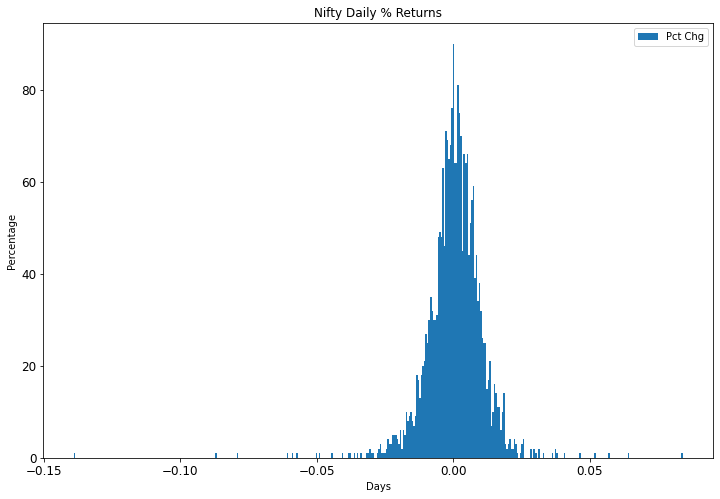

In [53]:
# plotting the daily returns via histograms

df.hist('Pct Chg', grid=False, figsize=(12,8), bins=400, legend=True, xlabelsize=12, ylabelsize=12)
plt.title("Nifty Daily % Returns")
plt.xlabel("Days")
plt.ylabel("Percentage")
plt.show()

In [54]:
# Calculating the HPR or cumulative returns over the period

df['Pct Chg'].sum()

1.1816141658823653

In [55]:
# Returns are 118% in log terms

In [56]:
# Calculating final value of investment

round(np.exp(df['Pct Chg'].sum()),2)

3.26

In [57]:
# What is an investment in 1 unit of the nifty worth after 10y at 118% returns?

final_value = df['Adj Close'][0] * np.exp(df['Pct Chg'].sum())
round(final_value,1)

20267.9

In [58]:
# Another way to verify this

round(df['Adj Close'][-1]/df['Adj Close'][0],2)

3.26

In [59]:
# Quick look at the dataframe again

df.head()

,Adj Close,Prev Close,Pct Chg
Date,,,
2013-12-02,6217.85,NaN,NaN
2013-12-03,6201.85,6217.85,-0.002577
2013-12-04,6160.95,6201.85,-0.006617
2013-12-05,6241.10,6160.95,0.012925
2013-12-06,6259.90,6241.10,0.003008


In [60]:
df.tail()

,Adj Close,Prev Close,Pct Chg
Date,,,
2023-11-24,19794.70,19802.00,-0.000369
2023-11-28,19889.70,19794.70,0.004788
2023-11-29,20096.60,19889.70,0.010349
2023-11-30,20133.15,20096.60,0.001817
2023-12-01,20267.90,20133.15,0.006671


In [61]:
# Calculating the value of the investment at the end of each day

np.exp(df['Pct Chg'].cumsum())

Date
2013-12-02         NaN
2013-12-03    0.997427
2013-12-04    0.990849
2013-12-05    1.003739
2013-12-06    1.006763
                ...   
2023-11-24    3.183528
2023-11-28    3.198807
2023-11-29    3.232082
2023-11-30    3.237960
2023-12-01    3.259632
Name: Pct Chg, Length: 2455, dtype: float64

In [62]:
# Lets add this feature as a new column in our dataframe

df['Cuml_Ret'] = round(np.exp(df['Pct Chg'].cumsum()),3)

In [63]:
# Let's see the dataframe again

df

,Adj Close,Prev Close,Pct Chg,Cuml_Ret
Date,,,,
2013-12-02,6217.85,NaN,NaN,NaN
2013-12-03,6201.85,6217.85,-0.002577,0.997
2013-12-04,6160.95,6201.85,-0.006617,0.991
2013-12-05,6241.10,6160.95,0.012925,1.004
2013-12-06,6259.90,6241.10,0.003008,1.007
...,...,...,...,...
2023-11-24,19794.70,19802.00,-0.000369,3.184
2023-11-28,19889.70,19794.70,0.004788,3.199
2023-11-29,20096.60,19889.70,0.010349,3.232


In [64]:
# Dropping the first row since it has NaNs

df.dropna(inplace=True)

In [65]:
df.shape

(2454, 4)

In [66]:
# Lets check the dataframe again

df.head()

,Adj Close,Prev Close,Pct Chg,Cuml_Ret
Date,,,,
2013-12-03,6201.85,6217.85,-0.002577,0.997
2013-12-04,6160.95,6201.85,-0.006617,0.991
2013-12-05,6241.10,6160.95,0.012925,1.004
2013-12-06,6259.90,6241.10,0.003008,1.007
2013-12-09,6363.90,6259.90,0.016477,1.023


In [74]:
df.tail()

,Adj Close,Prev Close,Pct Chg,Cuml_Ret
Date,,,,
2023-11-24,19794.70,19802.00,-0.000369,3.184
2023-11-28,19889.70,19794.70,0.004788,3.199
2023-11-29,20096.60,19889.70,0.010349,3.232
2023-11-30,20133.15,20096.60,0.001817,3.238
2023-12-01,20267.90,20133.15,0.006671,3.260


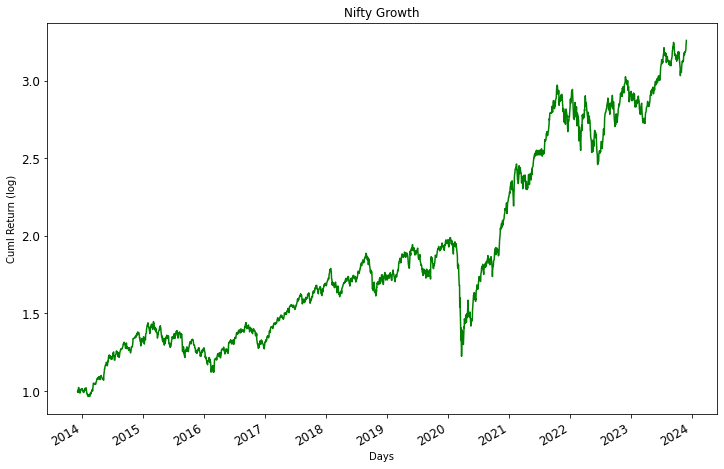

In [73]:
# Now lets plot the cuml returns

df['Cuml_Ret'].plot(figsize=(12,8), fontsize = 12, c='g')
plt.title("Nifty Growth")
plt.xlabel("Days")
plt.ylabel("Cuml Return (log)")
plt.show()

## 2) Performance Metrics

### Portfolio value ###

In [75]:
# Value of INR 1 invested 10y ago

df['Cuml_Ret'][-1]

3.26

In [77]:
# lets look at the statistics

round(df.describe(),2)

,Adj Close,Prev Close,Pct Chg,Cuml_Ret
count,2454.00,2454.00,2454.00,2454.00
mean,11786.66,11780.93,0.00,1.90
std,3913.11,3910.97,0.01,0.63
min,6000.90,6000.90,-0.14,0.96
25%,8494.44,8494.16,-0.00,1.37
50%,10741.10,10740.53,0.00,1.73
75%,15634.54,15619.78,0.01,2.51
max,20267.90,20192.35,0.08,3.26


### Annualized mean return and risk (stdev) ###

In [86]:
# Daily average return

daily_ret = df['Pct Chg'].mean()
daily_ret

0.0004815053650702378

In [87]:
# Annualised return

ann_ret = daily_ret * 252
ann_ret

0.12133935199769992

In [89]:
# Daily std dev

daily_stdev = df['Pct Chg'].std()
daily_stdev

0.01048696133385273

In [92]:
# Annualised std dev 

ann_stdev = daily_stdev * np.sqrt(252)
ann_stdev

0.16647535018874718

### Maximum Drawdown ###

In [94]:
df['Cuml_max'] = df['Cuml_Ret'].cummax()

In [99]:
# Lets look at the new column

print(df.head(20))
print(df.tail(20))

            Adj Close  Prev Close   Pct Chg  Cuml_Ret  Cuml_max
Date                                                           
2013-12-03    6201.85     6217.85 -0.002577     0.997     0.997
2013-12-04    6160.95     6201.85 -0.006617     0.991     0.997
2013-12-05    6241.10     6160.95  0.012925     1.004     1.004
2013-12-06    6259.90     6241.10  0.003008     1.007     1.007
2013-12-09    6363.90     6259.90  0.016477     1.023     1.023
2013-12-10    6332.85     6363.90 -0.004891     1.018     1.023
2013-12-11    6307.90     6332.85 -0.003948     1.014     1.023
2013-12-12    6237.05     6307.90 -0.011296     1.003     1.023
2013-12-13    6168.40     6237.05 -0.011068     0.992     1.023
2013-12-16    6154.70     6168.40 -0.002223     0.990     1.023
2013-12-17    6139.05     6154.70 -0.002546     0.987     1.023
2013-12-18    6217.15     6139.05  0.012642     1.000     1.023
2013-12-19    6166.65     6217.15 -0.008156     0.992     1.023
2013-12-20    6274.25     6166.65  0.017

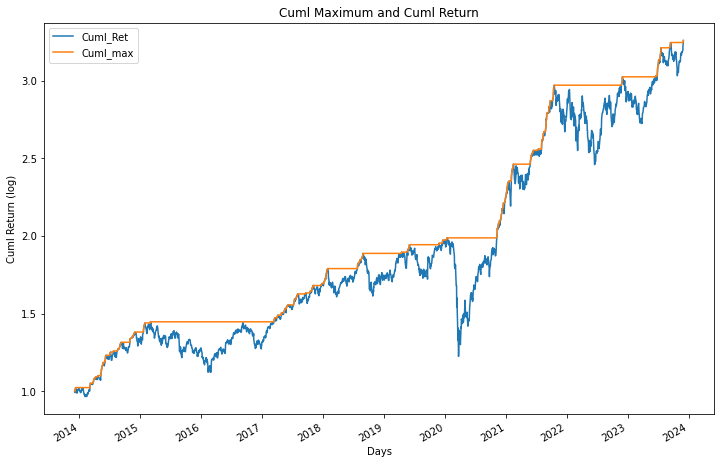

In [102]:
# Plotting the cumulative returns and the cumulative maximum for visual look at drawdown

df[['Cuml_Ret','Cuml_max']].plot(figsize=(12,8))
plt.title("Cuml Maximum and Cuml Return")
plt.xlabel("Days")
plt.ylabel("Cuml Return (log)")
plt.show()

In [103]:
# Creating a daily drawdown column

df['Drawdown'] = df['Cuml_max'] - df['Cuml_Ret']

In [104]:
# Looking up the new dataframe

df

,Adj Close,Prev Close,Pct Chg,Cuml_Ret,Cuml_max,Drawdown
Date,,,,,,
2013-12-03,6201.85,6217.85,-0.002577,0.997,0.997,0.000
2013-12-04,6160.95,6201.85,-0.006617,0.991,0.997,0.006
2013-12-05,6241.10,6160.95,0.012925,1.004,1.004,0.000
2013-12-06,6259.90,6241.10,0.003008,1.007,1.007,0.000
2013-12-09,6363.90,6259.90,0.016477,1.023,1.023,0.000
...,...,...,...,...,...,...
2023-11-24,19794.70,19802.00,-0.000369,3.184,3.247,0.063
2023-11-28,19889.70,19794.70,0.004788,3.199,3.247,0.048
2023-11-29,20096.60,19889.70,0.010349,3.232,3.247,0.015


In [106]:
# Let's look at the maximum drawndown, which is the difference between the cuml max and the cuml return on each day

max_dd = df['Drawdown'].max()
max_dd

0.764

In [108]:
# When did the max drawdown occur

max_dd_date = df['Drawdown'].idxmax()
max_dd_date

Timestamp('2020-03-23 00:00:00')

In [112]:
# Lets look at the index

np.where(df['Drawdown'] == 0.764)

(array([1538], dtype=int64),)

In [115]:
df.iloc[1538]

Adj Close     7610.250000
Prev Close    8745.450000
Pct Chg         -0.139038
Cuml_Ret         1.224000
Cuml_max         1.988000
Drawdown         0.764000
Name: 2020-03-23 00:00:00, dtype: float64